## Recherche séquentielle

In [6]:


def recherche_seq(L, e):
    trouve = False
    for element in L:
        if element == e:
            trouve = True
    return trouve	

def recherche_seq2(L, e):
    for element in L:
        if element == e:
            return True
    return False
    
def recherche_seq3(L, e):
    i = 0
    n = len(L)
    while i < n and L[i] != e:
        i += 1
    return i == n 



## Recherche dichotomique

Pour commencer, traiter cet exercice du Concours Castor Informatique :    [exercice Tas de Graine  du Castor Informatique 2017](https://concours.castor-informatique.fr/index.php?team=castor2017)

In [7]:
## Juste prix

from random import randint


def juste_prix(prix, prixInf, prixSup):
    proposition = (prixInf + prixSup) // 2
    essai = 1
    while proposition != prix:
        print("prixInf :", prixInf, "prixSup :", prixSup,
        "proposition :", proposition, )
        if proposition > prix:
            print("C'est moins.")
            prixSup = proposition - 1
        else:
            print("C'est plus.")
            prixInf = proposition + 1
        proposition = (prixInf + prixSup) // 2
        essai += 1
    print("Juste prix", prix, "trouvé en", essai, "essais.")
            
            
## Recherche dichotomique

def recherche_dicho(L, e):
    debut = 0
    fin = len(L) - 1
    while debut <= fin:
        milieu = (debut + fin) // 2
        if L[milieu] == e:
            return True
        elif L[milieu] < e:
            fin = milieu - 1
        else:
            debut = milieu + 1
    return False
    
def recherche_dicho2(L, e):
    x = 0
    n = len(L)
    pas = n // 2
    while pas >= 1:
        while x + pas < n and L[x + pas] <= e:
            x = x + pas
        pas = pas // 2
    return L[x] == e

## Comparaison entre recherche séquentielle et recherche dichotomique

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint

def timetest(fonction):
    """exécute la fonction et affiche son temps d'exécution """
    
    def fonction_modifiee(*args,**kargs):
        debut = time.perf_counter()
        fonction(*args,**kargs)
        return time.perf_counter() - debut
    
    return fonction_modifiee
    
def graphique_comparaison_recherches(liste_recherches):
    liste_taille = np.array(list(range(2, 100103, 100)))
    liste_temps = np.array([[0 for _ in range(len(liste_taille))] for _ in range(len(liste_recherches))], dtype='float')
    for i, taille in enumerate(liste_taille):
        liste = [randint(0, taille) for _ in range(taille)]
        element = taille + 1
        for j, recherche in enumerate(liste_recherches):
            liste_temps[j][i] = timetest(recherche)(liste, element) 
    plt.clf()
    fonction_modele = [lambda u : u, lambda t : np.log(t)/np.log(2)]
    for k, temps in enumerate(liste_temps):
        constante = np.mean([t/fonction_modele[k](taille) for (t, taille) in zip(temps, liste_taille)])
        plt.loglog(liste_taille, temps/constante, label=liste_recherches[k].__name__, marker='o')
    x = np.arange(1, max(liste_taille) + 1, 100)
    plt.loglog(x, np.log(x)/np.log(2))
    plt.loglog([1, max(liste_taille)], [1, max(liste_taille)])
    plt.title("Comparaison recherches séquentielle et dichotomique")
    plt.legend()
    plt.xlabel("Taille de la liste")
    plt.ylabel("Temps d'exécution normalisé")
    plt.savefig('comparaison-recherches.pdf')

In [9]:
%matplotlib inline

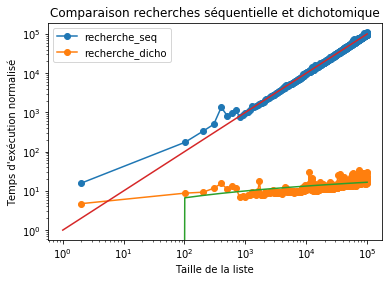

In [10]:
graphique_comparaison_recherches([recherche_seq, recherche_dicho])

## Reprogrammation des fonctions bisect_left et bisect_right du module bisect

In [11]:

def dicho_gauche(L, x):
    debut = 0
    fin = len(L) - 1
    if L[fin] < x:
        return fin + 1
    #invariant de boucle L[fin] >= x
    while debut < fin:
        milieu = (debut + fin) // 2
        if L[milieu] >= x:
            fin = milieu
        else:
            debut = milieu + 1
    return fin
    

def dicho_droite(L, x):
    debut = 0
    fin = len(L) - 1
    if L[fin] <= x:
        return fin + 1
    #invariant de boucle L[fin] > x
    while debut < fin:
        milieu = (debut + fin) // 2
        if L[milieu] > x:
            fin = milieu
        else:
            debut = milieu + 1
    return fin
    
def bisect_right(t, x):
    """
    Invariant conservé par la boucle : t[a] <= x < t[b]
    En sortie de boucle, on a 3 cas :
        invariant conservé : on retourne b
        t[b] <= x : on retourne b + 1
        t[a] > x : on retourne a
    """
    a, b = 0, len(t) - 1
    while b - a > 1:
        m = (a + b) // 2
        if t[m] > x:
            b = m
        else:
            a = m
    if t[b] <= x:
        return b + 1
    elif t[a] > x:
        return a
    else:
        return b
    
def bisect_left(t, x):
    """
    Invariant : t[a] < x <= t[b]
    En sortie de boucle, on a 3 cas :
        invariant conservé : on retourne b
        t[b] < x : on retourne b + 1
        t[a] >=  x : on retourne a
    """
    a, b = 0, len(t) - 1
    while b - a > 1:
        m = (a + b) // 2
        if t[m] >= x:
            b = m
        else:
            a = m
    if t[b] < x:
        return b + 1
    elif t[a] >= x:
        return a
    else:
        return b
        
        
def dicho_comptage(L, x):
    return dicho_droite(L, x) - dicho_gauche(L, x)
    
# In [9]: dicho_gauche([1,2,2,2,4,5], 2)
# Out[9]: 1
# 
# In [10]: dicho_droite([1,2,2,2,4,5], 2)
# Out[10]: 4
# 
# In [11]: dicho_comptage([1,2,2,2,4,5], 2)
# Out[11]: 3

t = list(range(10)) * 2
t.sort()
print(t)
print(bisect_left(t, 6.9))
print(dicho_gauche(t, 6.9))
print(bisect_left(t, 7))
print(dicho_gauche(t, 7))
print(bisect_right(t,7))
print(dicho_droite(t, 7))
print(bisect_right(t,7))
print(dicho_droite(t, 7.1))

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
14
14
14
14
16
16
16
16
